https://towardsdatascience.com/developing-scorecards-in-python-using-optbinning-ab9a205e1f69

In [ ]:
pip install optbinning

1. 데이터 가져오기

In [ ]:
import pandas as pd
from optbinning import Scorecard, BinningProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the train dataset
df_application = pd.read_csv('train_small2.csv', low_memory=True)
df_application.set_index('SK_ID_CURR', inplace=True)

# Split the dataset into train and test
df_application_train, df_application_test, y_train, y_test = train_test_split(
df_application, df_application.TARGET, test_size=0.2, random_state=42)

2. Binning

In [ ]:
# Define the feature list from dataset (including categorical and numerical)
list_features = df_application_train.drop(columns=['TARGET']).columns.values

# Define categorical features list
list_categorical = df_application_train.select_dtypes(include=['object', 'category']).columns.values

# Define selection criteria for BinningProcess
selection_criteria = {"iv": {"min": 0.005, 'max':0.5, "strategy": "highest"}}

# Instatiate BinningProcess
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_features,
    selection_criteria=selection_criteria,
)

3. Linear 파라미터 설정

In [ ]:
logreg = LogisticRegression(C=3, max_iter=1000, random_state=161)

4.  Scorecard 생성

In [ ]:
# Define scaling method and values
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 1000}

# Instatiate and fit Scorecard
scorecard = Scorecard(
    target='TARGET',
    binning_process=binning_process,
    estimator=logreg,
    scaling_method=scaling_method,
    scaling_method_params=scaling_method_data,
    intercept_based=False,
    reverse_scorecard=True,
)

scorecard.fit(df_application_train)

Scorecard(binning_process=BinningProcess(binning_fit_params=None,
                                         binning_transform_params=None,
                                         categorical_variables=array([], dtype=object),
                                         max_bin_size=None, max_n_bins=None,
                                         max_n_prebins=20, max_pvalue=None,
                                         max_pvalue_policy='consecutive',
                                         min_bin_size=None, min_n_bins=None,
                                         min_prebin_size=0.05, n_jobs=None,
                                         selection_criteria={'iv': {'max': 0.5,
                                                                    'min': 0....
          estimator=LogisticRegression(C=3, class_weight=None, dual=False,
                                       fit_intercept=True, intercept_scaling=1,
                                       l1_ratio=None, max_iter=1000,
         

5. 스코어카드 반출

In [ ]:
scorecard_summary = scorecard.table(style="detailed").round(3)
scorecard_summary.to_csv('scorecard_table_detailed.csv', index=False)

6. KS / AR


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


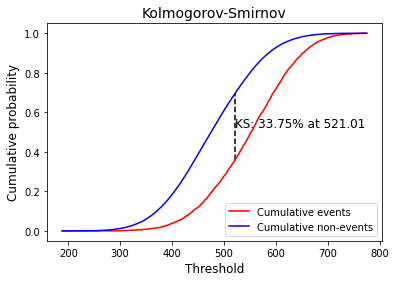

In [ ]:
from optbinning.scorecard.plots import plot_ks, plot_auc_roc

df_application_test.loc[:,"score"] = scorecard.score(df_application_test)

# Kolmogorov_Smirnov Plot
plot_ks(df_application_test.TARGET, df_application_test.score)


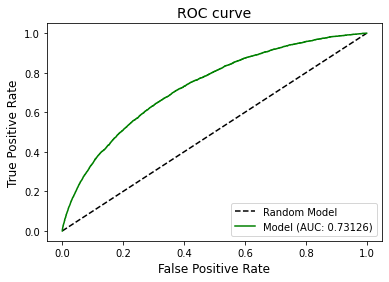

In [ ]:
# ROC-AUC plot
plot_auc_roc(df_application_test.TARGET, df_application_test.score)